# FMT_PROJECT:

#### DOMAIN: 
Semiconductor manufacturing process

#### CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of 
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to 
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

#### DATA DESCRIPTION: 
sensor-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features. 
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

#### PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### Importing the needed libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Steps and tasks: (60)

### 1. Import and understand the data.

#### 1.A Import ‘signal-data.csv’ as DataFrame.

In [273]:
df1 = pd.read_csv('signal-data.csv')
df1.head() #This df1 variable stores signal-data.csv dataset

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [274]:
print('The shape of the given dataset',df1.shape) #This displays the dataset thats given

The shape of the given dataset (1567, 592)


In [275]:
df1.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [276]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [277]:
df1.dtypes.value_counts() 

float64    590
object       1
int64        1
dtype: int64

There are totally 592 columns where 590 are of float type, 1 each of int and object datatype.

#### 1.B Print 5 point summary and share at least 2 observations.

In [278]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [279]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


#### Share at least 2 observations

1. Mean & Median are nearly equal, which means data is distributed uniformly.
2. The median value is 3011 and the minimum and maximum ranges between 2743 and 3356, This differs for all the features here.

In [280]:
df1.columns = 'feature_' + df1.columns
df1.rename(columns = {'feature_Time':'Time'}, inplace = True) 
df1.rename(columns = {'feature_Pass/Fail':'Pass_Fail'}, inplace = True)
# Time and Pass_Final are not features

In [281]:
df1.isnull().sum() #Null values are dispalyed

Time            0
feature_0       6
feature_1       7
feature_2      14
feature_3      14
               ..
feature_586     1
feature_587     1
feature_588     1
feature_589     1
Pass_Fail       0
Length: 592, dtype: int64

In [282]:
percent_missing = df1.isnull().sum() * 100/len(df1)
missing_value = pd.DataFrame({'Column Name' : df1.columns,'Percentage_Missing' : percent_missing})
missing_value

,Column Name,Percentage_Missing
Time,Time,0.000000
feature_0,feature_0,0.382897
feature_1,feature_1,0.446713
feature_2,feature_2,0.893427
feature_3,feature_3,0.893427
...,...,...
feature_586,feature_586,0.063816
feature_587,feature_587,0.063816
feature_588,feature_588,0.063816
feature_589,feature_589,0.063816


### 2. Data cleansing:

#### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [283]:
print('The shape of the dataset before removing features with 20% more null values',df1.shape)

The shape of the dataset before removing features with 20% more null values (1567, 592)


In [284]:
def remove_null(df1, thres):
    columns = df1.columns
    cols_remove = []
    for i in columns:
        if (df1[i].isna().sum() / df1.shape[0] >= thres):
            cols_remove.append(i)
    print('Number of features removed with more than 20% of null values \t:',len(cols_remove))
    df1 = df1.drop(labels=cols_remove, axis=1)
    return (df1)

In [285]:
df2 = remove_null(df1,0.2)
# The function is defined to remove the features with 20% more null values and its called in the above statement.

Number of features removed with more than 20% of null values 	: 32


In [286]:
print('The shape of the dataset after removing features with 20% more null values',df2.shape)

The shape of the dataset after removing features with 20% more null values (1567, 560)


#### B. Identify and drop the features which are having same value for all the rows. 

In [287]:
cols = df2.select_dtypes([np.number]).columns
std = df2[cols].std()
cols_to_drop = std[std==0].index
df2.drop(cols_to_drop, axis=1,inplace=True)
df2.head()

,Time,feature_0,feature_1,feature_2,feature_3,feature_4,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [288]:
print('The shape of the dataset after removing the features having same values for all rows',df2.shape)

The shape of the dataset after removing the features having same values for all rows (1567, 444)


In [289]:
#The values -1,1 are changed to 0,1 in the Pass_Fail column
df2['Pass_Fail'] = df2['Pass_Fail'].replace([-1,1],[0,1])

In [290]:
df2.head()

,Time,feature_0,feature_1,feature_2,feature_3,feature_4,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


In [291]:
rows = df2.isnull().any(axis = 1).sum()
print( 'All the' ,rows,'rows have atleast one missing value')

All the 589 rows have atleast one missing value


###### The null values are all filled with 0

In [292]:
df2.fillna(0,inplace=True)
rows = df2.isnull().any(axis = 1).sum()
print( 'All the' ,rows,'rows have atleast one missing value')

All the 0 rows have atleast one missing value


In [293]:
df = df2.copy() #df2 dataset is copied to df

In [294]:
df = df.drop(columns = ['Time'], axis = 1) #Time column is dropped

In [295]:
col = ['Pass_Fail']
for i in col:
       df[i] = df[i].astype('int')

In [296]:
df.dtypes.value_counts()

float64    442
int32        1
dtype: int64

#### C. Drop other features if required using relevant functional knowledge. Clearly justify the same

#### In this method, we try to replace the features at 0.25,0.75 quantile(outliers) with the median.

In [297]:
#for i in df.columns:
#q1 = df[i].quantile(0.25)
#q3 = df[i].quantile(0.75)
#iqr = q3 - q1
    
#low = q1 - 1.5 * iqr
#high = q3 + 1.5 * iqr
    
#df.loc[(df[i] < low) | (df[i] > high), i] = df[i].median()

But when we do this method, we end up in a dataset that contains only features with 0 as 'Pass_Fail' value.

So there is no need to do this method.

#### D. Check for multi-collinearity in the data and take necessary action

In [298]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

The features of corr above 0.70 are dropped

In [299]:
row,column=df.shape
print('After dropping the correlated variables the dataset contains', row, 'rows and', column, 'columns')

After dropping the correlated variables the dataset contains 1567 rows and 186 columns


In [300]:
df.shape

(1567, 186)

In [301]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_8,feature_9,feature_10,feature_11,feature_14,...,feature_565,feature_570,feature_571,feature_572,feature_582,feature_583,feature_586,feature_587,feature_589,Pass_Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,7.9558,...,0.0000,533.8500,2.1113,8.95,0.5005,0.0118,0.0000,0.0000,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,10.1548,...,0.0000,535.0164,2.4335,5.92,0.5019,0.0223,0.0096,0.0201,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,9.5157,...,0.6219,535.0245,2.0293,11.21,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,9.6052,...,0.1630,530.5682,2.0253,9.33,0.4990,0.0103,0.0202,0.0149,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,10.5661,...,0.0000,532.0155,2.0275,8.83,0.4800,0.4766,0.0202,0.0149,73.8432,0


#### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions

1. The given dataset with 592 feature columns are first reduced to 560, by dropping the columns with more than 20% null values.

2. The features columns are checked for same values in all rows and by checking with the standard deviation condition to 0.

3. The values -1,1 are changed to 0,1 in the Pass_Fail column, also the nan values are filled with 0 and finally the 
   dataset has 443 columns.

4. In this method, we try to replace the features at 0.25,0.75 quantile (outliers) with the median.But it can be followed as mentioned above.

5. The features with more than 70% corr() is dropped.

##### the final dataset has columns (features) of 186.

### 3. Data analysis & visualisation:

#### A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. 

In [302]:
df["Pass_Fail"].value_counts()

0    1463
1     104
Name: Pass_Fail, dtype: int64

#### Univariate analysis means involving only one variable for analysing purpose. Here its 'Pass_Fail' feature.
The 1567 datapoints are divided as 1463 fail and 104 pass

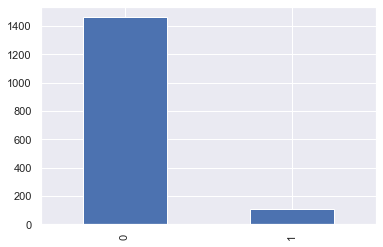

In [303]:
df["Pass_Fail"].value_counts().plot(kind="bar");

(array([1463.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         104.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

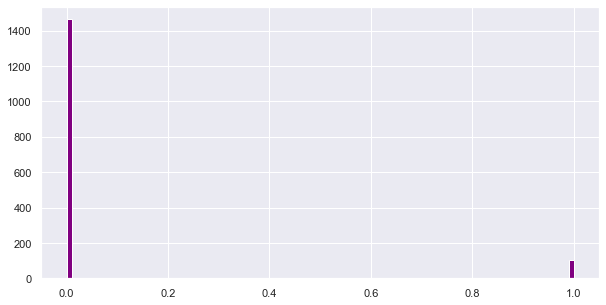

In [304]:
plt.figure(figsize=(10,5))
plt.hist(df["Pass_Fail"],bins=100,color='purple')

<AxesSubplot:xlabel='Pass_Fail', ylabel='Density'>

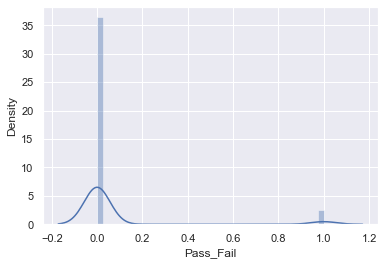

In [305]:
sns.distplot(df['Pass_Fail'],kde=True)

Univariate analysis means involving only one variable for analysing purpose. Here its 'Pass_Fail' feature.

The 1567 datapoints are divided as 1463 fail and 104 pass.

#### B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

#### Bivariate Analysis:

<AxesSubplot:xlabel='feature_570', ylabel='Pass_Fail'>

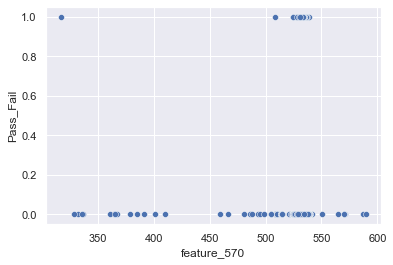

In [306]:
sns.scatterplot(df['feature_570'], df['Pass_Fail'])

Feature_570 is plotted against Pass_Fail, most of the datapoints are categorised to 0 and some of it to 1.

<AxesSubplot:xlabel='feature_589', ylabel='feature_1'>

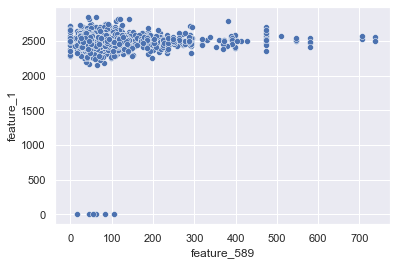

In [307]:
sns.scatterplot(df['feature_589'], df['feature_1'])

Feature_589 is plotted against Feature_1, most of the datapoints are categorised to 0 and some of it to 1.

#### Multivariate analysis:

In [308]:
df.corr() 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_8,feature_9,feature_10,feature_11,feature_14,...,feature_565,feature_570,feature_571,feature_572,feature_582,feature_583,feature_586,feature_587,feature_589,Pass_Fail
feature_0,1.000000,-0.047782,0.007590,0.009448,-0.000915,-0.050979,0.009959,-0.010253,0.013038,-0.058009,...,0.026128,-0.019543,-0.018934,0.018681,0.010503,0.019840,0.044745,0.005233,0.021489,0.006149
feature_1,-0.047782,1.000000,-0.030448,0.006021,0.002192,0.027609,0.003704,0.028889,0.009722,0.017214,...,0.013126,-0.005541,-0.027022,0.015385,-0.017392,0.003809,-0.009219,0.039479,0.044464,-0.019672
feature_2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.002600,-0.045731,0.004713,-0.011469,-0.012309,...,-0.052832,-0.014631,0.040179,0.021562,-0.010627,-0.004771,0.015733,-0.007090,-0.030434,0.024929
feature_3,0.009448,0.006021,0.323782,1.000000,-0.054015,-0.108217,0.051567,0.046281,-0.035772,-0.026669,...,0.059957,-0.000589,-0.004817,0.013573,0.009788,0.022593,0.038755,-0.038371,-0.084449,-0.016341
feature_4,-0.000915,0.002192,0.020438,-0.054015,1.000000,-0.020082,0.053859,-0.006505,0.001362,-0.017112,...,0.046680,0.005206,-0.081680,-0.011870,0.012778,-0.001323,-0.043693,-0.030930,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_583,0.019840,0.003809,-0.004771,0.022593,-0.001323,0.012083,-0.036825,0.040363,-0.007261,0.003029,...,0.009797,0.014021,0.006030,-0.017568,-0.027682,1.000000,0.002391,-0.001809,-0.002453,0.006131
feature_586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.017642,0.032423,0.000758,0.024004,-0.062264,...,0.045107,0.020314,-0.056375,-0.008409,-0.008240,0.002391,1.000000,0.169634,-0.484741,0.004448
feature_587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,0.027655,0.057856,0.047377,0.011065,0.046460,...,0.017801,0.007877,-0.010592,-0.001154,0.018981,-0.001809,0.169634,1.000000,0.391503,0.035670
feature_589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.016895,0.004106,0.008651,0.008746,0.069264,...,0.022137,-0.010708,0.010925,-0.022511,0.028502,-0.002453,-0.484741,0.391503,1.000000,-0.002472


This gives a table of correlation values between the 590 features and the Target column.

##### Heatmap

<AxesSubplot:>

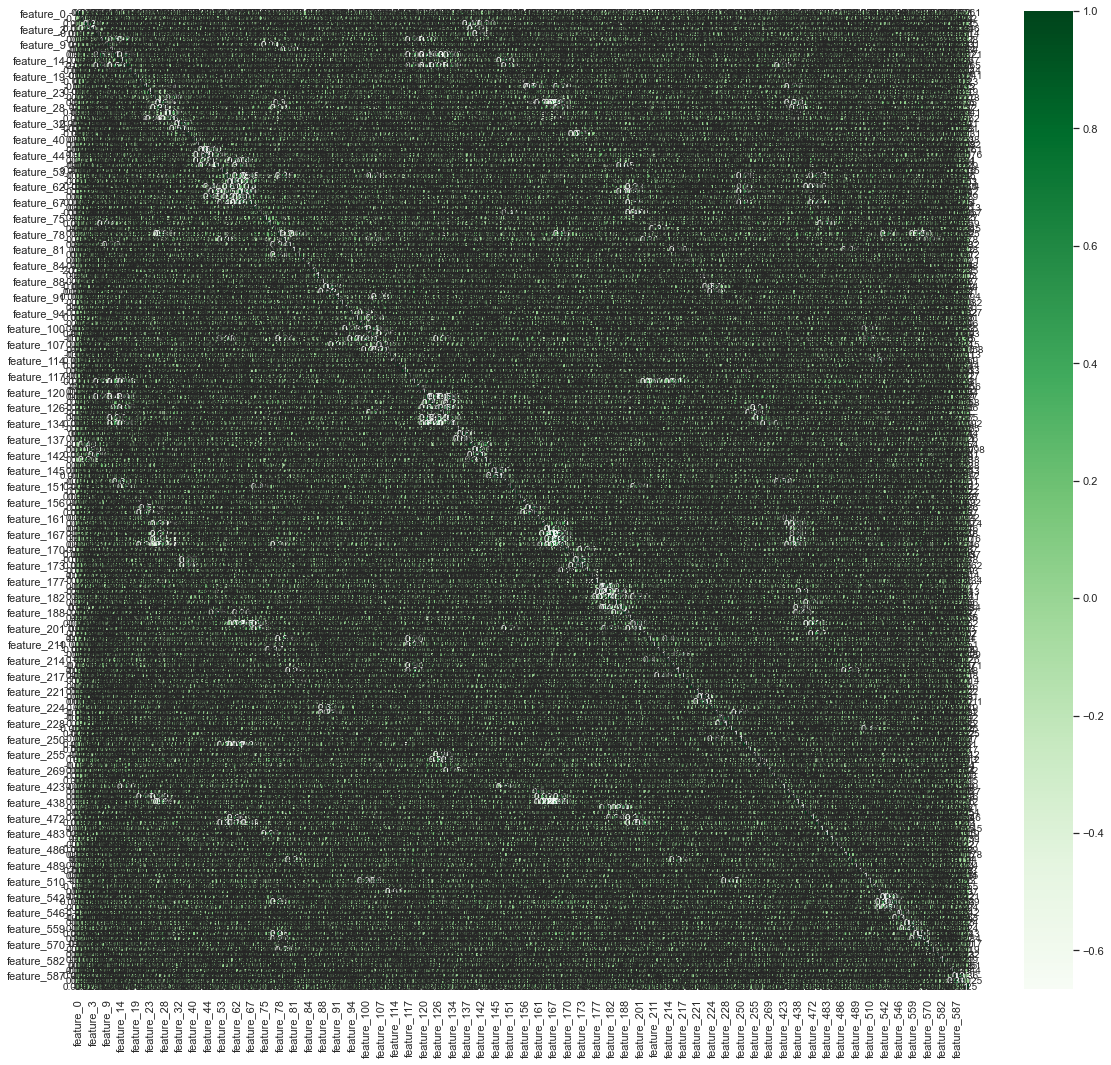

In [309]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,cmap='Greens') 

Heatmap gives a better view of the correlation table of the features.

<AxesSubplot:xlabel='feature_1', ylabel='feature_589'>

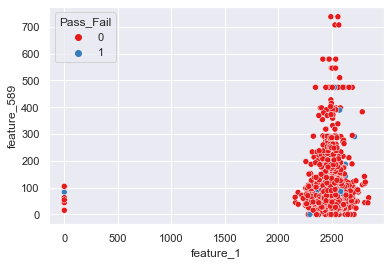

In [310]:
sns.scatterplot(df['feature_1'], df['feature_589'], hue=df['Pass_Fail'], palette='Set1') 

Most of the datapoints having feature_589 and feature_1  falls into fail category(0) and only some fall into pass category(1).

### 4. Data Pre-processing:

#### A. Segregate predictors vs target attributes. 

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The target column is dropped for X and X is full of independent variables.

The y consists of the target column "Pass_Fail".

In [312]:
X = df.drop(columns='Pass_Fail')
# X is an independent variable.
y = df['Pass_Fail']
# y is the target variable.

In [313]:
X.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_8,feature_9,feature_10,feature_11,feature_14,...,feature_562,feature_565,feature_570,feature_571,feature_572,feature_582,feature_583,feature_586,feature_587,feature_589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,1.460995,-0.000840,0.000146,0.963122,8.988130,...,216.957377,0.120242,530.523623,2.101836,28.450165,0.499777,0.015308,0.021445,0.016464,99.606461
std,200.204648,184.815753,209.206773,458.937272,56.104457,0.090461,0.015107,0.009296,0.036620,2.821529,...,99.925253,0.092119,17.499736,0.275112,86.304681,0.013084,0.017179,0.012366,0.008815,93.895701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,-0.034900,0.000000,0.000000,...,0.000000,0.000000,317.196400,0.980200,3.540000,0.000000,0.000000,-0.016900,0.000000,0.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,1.410950,-0.010800,-0.005600,0.958000,7.080300,...,250.420000,0.087700,530.702700,1.982900,7.500000,0.497900,0.011600,0.013400,0.010600,44.368600
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,1.461500,-0.001300,0.000400,0.965800,8.956500,...,264.272000,0.090300,532.398200,2.118600,8.650000,0.500200,0.013800,0.020500,0.014800,71.778000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,1.516850,0.008400,0.005900,0.971300,10.858700,...,264.733000,0.166850,534.356400,2.290650,10.130000,0.502350,0.016500,0.027600,0.020300,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,1.656400,0.074900,0.053000,0.984800,19.546500,...,311.404000,0.689200,589.508200,2.739500,454.560000,0.509800,0.476600,0.102800,0.079900,737.304800


#### C. Perform train-test split and standardise the data or vice versa if required. 

Standardise the data using zscore

In [314]:
X_Scaled = X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,1567.0,1.183199e-17,1.000319,-15.003994,-0.186072,0.040019,0.267958,1.765954
feature_1,1567.0,-9.915489e-16,1.000319,-13.448497,-0.179620,0.076907,0.292515,1.957920
feature_2,1567.0,1.299464e-15,1.000319,-10.427881,-0.000894,0.095958,0.177720,0.642534
feature_3,1567.0,-2.323887e-17,1.000319,-3.016410,-0.662143,-0.218976,0.449592,5.081054
feature_4,1567.0,-4.587109e-17,1.000319,-0.074162,-0.056137,-0.050804,-0.047083,19.797564
...,...,...,...,...,...,...,...,...
feature_582,1567.0,-3.692705e-15,1.000319,-38.210561,-0.143508,0.032339,0.196717,0.766309
feature_583,1567.0,-1.974950e-17,1.000319,-0.891382,-0.215915,-0.087809,0.069411,26.860983
feature_586,1567.0,3.391600e-16,1.000319,-3.101780,-0.650754,-0.076421,0.497911,6.580986
feature_587,1567.0,1.892144e-16,1.000319,-1.868461,-0.665520,-0.188883,0.435284,7.198987


#### Splitting the data for train and test: 

In [315]:
X_train, X_test, Y_train, Y_test =train_test_split(X_Scaled,y, test_size=.30,random_state=105,stratify=y) 
#Standardised data is used

The dataset(X,y) is then split with 70% for training and 30% for testing 

#### B. Check for target balancing and fix it if found imbalanced

In [316]:
print('Before Sampling:')
print(y.value_counts())

Before Sampling:
0    1463
1     104
Name: Pass_Fail, dtype: int64


The target column is imbalanced as we can see there are 1463 datapoints for 0 and 104 datapoints for 1.

In [317]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [318]:
smote_nc = SMOTENC(categorical_features = [1,3,5],random_state = 42)
x_s,y_s = smote_nc.fit_resample(X_Scaled,y)

In [319]:
print('Before Sampling:')
print(y_s.value_counts())

Before Sampling:
0    1463
1    1463
Name: Pass_Fail, dtype: int64


The samples are balanced.

#### D. Check if the train and test data have similar statistical characteristics when compared with original data

##### Statistical Characteristics of the Original Dataset

In [320]:
df1.describe().T # Original dataset without any preprocessing techniques

,count,mean,std,min,25%,50%,75%,max
feature_0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
feature_1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
feature_2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
feature_3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
feature_4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
feature_586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
feature_587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
feature_588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
feature_589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


##### Statistical Characteristics of the Train and Test Dataset

In [321]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,1096.0,0.037260,0.738128,-15.003994,-0.183274,0.057631,0.273167,1.765954
feature_1,1096.0,0.027968,0.830120,-13.448497,-0.178659,0.072036,0.292934,1.957920
feature_2,1096.0,-0.008244,1.058919,-10.427881,-0.000894,0.093620,0.181174,0.642534
feature_3,1096.0,-0.000037,1.016059,-3.016410,-0.674352,-0.218976,0.450313,4.873329
feature_4,1096.0,0.003562,1.036105,-0.074162,-0.056162,-0.050903,-0.047052,19.797564
...,...,...,...,...,...,...,...,...
feature_582,1096.0,-0.012572,1.184413,-38.210561,-0.135863,0.024693,0.200540,0.758663
feature_583,1096.0,0.017775,1.180389,-0.891382,-0.217371,-0.087809,0.075234,26.860983
feature_586,1096.0,-0.017981,0.978725,-3.101780,-0.650754,-0.088555,0.497911,6.580986
feature_587,1096.0,-0.024485,0.982816,-1.505309,-0.688217,-0.188883,0.435284,7.198987


In [322]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,471.0,-0.086702,1.433153,-15.003994,-0.186972,-0.005499,0.256441,1.408555
feature_1,471.0,-0.065081,1.312447,-13.448497,-0.179620,0.083077,0.289267,1.643778
feature_2,471.0,0.019184,0.849176,-10.427881,-0.000124,0.096117,0.170309,0.589672
feature_3,471.0,0.000086,0.963756,-3.016410,-0.652853,-0.219121,0.444271,5.081054
feature_4,471.0,-0.008289,0.912626,-0.074162,-0.056032,-0.050679,-0.047083,19.755190
...,...,...,...,...,...,...,...,...
feature_582,471.0,0.029254,0.253996,-0.632822,-0.154977,0.032339,0.192895,0.766309
feature_583,471.0,-0.041361,0.292328,-0.512888,-0.215915,-0.093632,0.051942,1.851246
feature_586,471.0,0.041842,1.048726,-2.114899,-0.634576,-0.052154,0.493867,6.580986
feature_587,471.0,0.056977,1.038743,-1.868461,-0.625800,-0.177535,0.457981,7.198987


On comparing the 5-point summary of the original data with train and test datas:

The Mean, Median, Standard Deviation, Min and Max are almost varying nearby.

### 5. Model training, testing and tuning: 

#### A. Use any Supervised Learning technique to train a model

Here the "raw" data without standardised one is used for splitting into X and Y

In [323]:
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X,y, test_size=.30,random_state=105,stratify=y)

1. Here,Logistic Regression model is fit on the training data.
2. Then,X_test1 values are used to predict the outputs and stored in pred.
3. Pred and Y_test1 values are compared , its accuracy is found.

In [324]:
logit = LogisticRegression()
logit.fit(X_train1,Y_train1)
logit_pred1 = logit.predict(X_test1)
print('Accuracy on Training Data:',logit.score(X_train1,Y_train1))#Training data accuracy
print('Accuracy on Testing Data:',logit.score(X_test1,Y_test1))#Testing Data Accuracy

Accuracy on Training Data: 0.9333941605839416
Accuracy on Testing Data: 0.9320594479830149


The performance metrics are :
1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

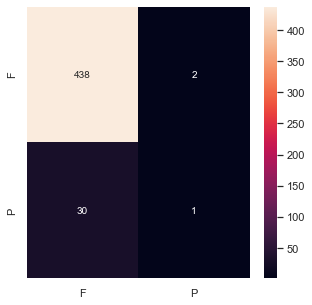

In [325]:
cm = confusion_matrix(Y_test1,logit_pred1,labels = [0,1])
df_cm = pd.DataFrame(cm,index = [i for i in ['F','P']],
                     columns = [i for i in ['F','P']])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm,annot = True,fmt = 'g')
plt.show()

In [326]:
print('Classification Matrix:\n',classification_report(Y_test1,logit_pred1))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.94      1.00      0.96       440
           1       0.33      0.03      0.06        31

    accuracy                           0.93       471
   macro avg       0.63      0.51      0.51       471
weighted avg       0.90      0.93      0.91       471



Though accuracy is good, model is poor in predicting 1(Pass) datapoints.

This can be found by seeing Recall Value.

#### B. Use cross validation technique - KFold

In [327]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1253, Test set:314
Fold:2, Train set: 1253, Test set:314
Fold:3, Train set: 1254, Test set:313
Fold:4, Train set: 1254, Test set:313
Fold:5, Train set: 1254, Test set:313


In [328]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [329]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [330]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.08097409 -0.06257981 -0.08165687 -0.05676139 -0.09057088]
rmse= 0.27


Here the cross validation technique used is Kfold where n_splits is 5 and rmse is calculated respectively.

There is not much of overfit of the data.

#### C. Apply hyper-parameter tuning techniques to get the best accuracy

In [331]:
myList = list(range(1,51))
# This 1 to 51 tells the no of neighbours for each query
n_neighbors = list(filter(lambda x:x % 2 != 0,myList))

In [332]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, Y_train1)
    # predict the response
    Y_pred1 = knn.predict(X_test1)
    # evaluate accuracy
    scores = accuracy_score(Y_test1, Y_pred1)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = n_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


In [333]:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean',weights='distance')
    KNN.fit(X_train1,Y_train1)
    pred_labels = KNN.predict(X_test1)
    print('Accuracy on Training Data for k {} is {}:'.format(i,KNN.score(X_train1,Y_train1)))
    print('Accuracy on Testing Data for k {} is {}:'.format(i,KNN.score(X_test1,Y_test1)))
    print('Classification matirix:\n',classification_report(Y_test1,pred_labels))

Accuracy on Training Data for k 1 is 1.0:
Accuracy on Testing Data for k 1 is 0.8789808917197452:
Classification matirix:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       440
           1       0.09      0.10      0.10        31

    accuracy                           0.88       471
   macro avg       0.51      0.52      0.52       471
weighted avg       0.88      0.88      0.88       471

Accuracy on Training Data for k 3 is 1.0:
Accuracy on Testing Data for k 3 is 0.921443736730361:
Classification matirix:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       440
           1       0.00      0.00      0.00        31

    accuracy                           0.92       471
   macro avg       0.47      0.49      0.48       471
weighted avg       0.87      0.92      0.90       471

Accuracy on Training Data for k 5 is 1.0:
Accuracy on Testing Data for k 5 is 0.9320594479830149:
Cla

Since the optimal k value is 7, which we got in hypertuning.Therefore we get the better accuracy, precision, recall and f1_score. 

#### D. Use any other technique/method which can enhance the model performance

#### Here we are using the dataset that is standardised and balanced to costruct the models

In [334]:
X_train, X_test, Y_train, Y_test =train_test_split(X_Scaled,y, test_size=.30,random_state=105,stratify=y) 
#Standardised data is used

In [335]:
print('Before Sampling:')
print(y.value_counts())

Before Sampling:
0    1463
1     104
Name: Pass_Fail, dtype: int64


In [336]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
smote_nc = SMOTENC(categorical_features = [1,3,5],random_state = 42)
x_s,y_s = smote_nc.fit_resample(X_Scaled,y)
print('After Sampling:')
print(y_s.value_counts())

After Sampling:
0    1463
1    1463
Name: Pass_Fail, dtype: int64


The dataset is standardised and balanced.

#### The performance metrics are :
1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

In [337]:
logit = LogisticRegression()
logit.fit(X_train,Y_train)
logit_pred = logit.predict(X_test)
print('Accuracy on Training Data:',logit.score(X_train,Y_train))#Training data accuracy
print('Accuracy on Testing Data:',logit.score(X_test,Y_test))#Testing Data Accuracy

Accuracy on Training Data: 0.9653284671532847
Accuracy on Testing Data: 0.8853503184713376


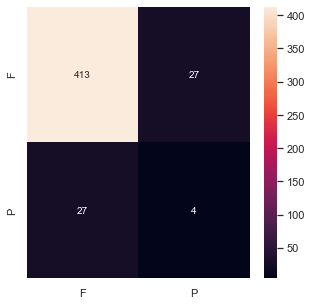

In [338]:
cm = confusion_matrix(Y_test,logit_pred,labels = [0,1])
df_cm = pd.DataFrame(cm,index = [i for i in ['F','P']],
                     columns = [i for i in ['F','P']])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm,annot = True,fmt = 'g')
plt.show()

In [339]:
print('Classification Matrix:\n',classification_report(Y_test,logit_pred))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       440
           1       0.13      0.13      0.13        31

    accuracy                           0.89       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.89      0.89      0.89       471



Though accuracy is good, model is poor in predicting 1(Pass) datapoints.

This can be found by seeing Recall Value.

#### Use cross validation technique - KFold on Standardised and balanced data

In [340]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_Scaled, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1253, Test set:314
Fold:2, Train set: 1253, Test set:314
Fold:3, Train set: 1254, Test set:313
Fold:4, Train set: 1254, Test set:313
Fold:5, Train set: 1254, Test set:313


In [341]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [342]:
score = cross_val_score(linear_model.LinearRegression(), X_Scaled, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-8.09740928e-02 -1.31699424e+24 -8.16568671e-02 -5.67613888e-02
 -9.05708764e-02]
rmse= 513223975204.35


As rmse is high, which means that there is overfit of the data.

#### Apply hyper-parameter tuning techniques to get the best accuracy for standardised dataset

In [343]:
myList = list(range(1,51))
# This 1 to 51 tells the no of neighbours for each query
n_neighbors = list(filter(lambda x:x % 2 != 0,myList))

In [344]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    Y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, Y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = n_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


In [345]:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean',weights='distance')
    KNN.fit(X_train,Y_train)
    pred_labels = KNN.predict(X_test)
    print('Accuracy on Training Data for k {} is {}:'.format(i,KNN.score(X_train,Y_train)))
    print('Accuracy on Testing Data for k {} is {}:'.format(i,KNN.score(X_test,Y_test)))
    print('Classification matirix:\n',classification_report(Y_test,pred_labels))

Accuracy on Training Data for k 1 is 1.0:
Accuracy on Testing Data for k 1 is 0.8980891719745223:
Classification matirix:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       440
           1       0.16      0.13      0.14        31

    accuracy                           0.90       471
   macro avg       0.55      0.54      0.54       471
weighted avg       0.89      0.90      0.89       471

Accuracy on Training Data for k 3 is 1.0:
Accuracy on Testing Data for k 3 is 0.9299363057324841:
Classification matirix:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       440
           1       0.38      0.10      0.15        31

    accuracy                           0.93       471
   macro avg       0.66      0.54      0.56       471
weighted avg       0.90      0.93      0.91       471

Accuracy on Training Data for k 5 is 1.0:
Accuracy on Testing Data for k 5 is 0.9363057324840764:
Cl

After standardising the dataset, model is run on it an dthe metrics are caluculated.

Also the CV techniques are applied and even hyper tuning is performed.

### E. Display and explain the classification report in detail. 

In [346]:
print('Classification Matrix of Standardised data:\n',classification_report(Y_test,logit_pred))

Classification Matrix of Standardised data:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       440
           1       0.13      0.13      0.13        31

    accuracy                           0.89       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.89      0.89      0.89       471



In [347]:
print('Classification Matrix of Raw data:\n',classification_report(Y_test1,logit_pred1))

Classification Matrix of Raw data:
               precision    recall  f1-score   support

           0       0.94      1.00      0.96       440
           1       0.33      0.03      0.06        31

    accuracy                           0.93       471
   macro avg       0.63      0.51      0.51       471
weighted avg       0.90      0.93      0.91       471



Accuracies of both data are good. But the recall turns out to be bad for raw data.

#### F. Apply the above steps for all possible models that you have learnt so far

Here the standardised data is used for all models.

### SVM
#### Various Parameters of SVM are:
1. C : Regularization parameter
2. kernel = specifies the type of kernel to be used in the algorithm
3. gamma = Kernel Coefficient

In [348]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model = SVC(C=0.1, kernel='linear', gamma=1) # Parameters are set

svc_model.fit(X_train, Y_train)
# Model is fir on the Trainign Data
prediction = svc_model.predict(X_test)
#labels are predicted based on X_test values

In [349]:
print('Acuuracy of Training Data',svc_model.score(X_train, Y_train))
print('Acuuracy of Testing Data',svc_model.score(X_test, Y_test))

Acuuracy of Training Data 0.9616788321167883
Acuuracy of Testing Data 0.9002123142250531


In [350]:
print('Classification matrix:\n',classification_report(prediction,Y_test))

Classification matrix:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       449
           1       0.10      0.14      0.11        22

    accuracy                           0.90       471
   macro avg       0.53      0.54      0.53       471
weighted avg       0.92      0.90      0.91       471



The SVM Model is constructed on the standardised and balanced data.
Its accuracy and reports are displayed.

### XGbClassifier Baseline Model with default parameters

The performance metrics are :

1. Accuracy
2. Confusion Matrix
3. Classification report - precision,recall,f1_score

In [351]:
model3 = XGBClassifier()
model3.fit(X_train, Y_train)


# make predictions for test data
y_pred = model3.predict(X_test)
predictions = [round(value) for value in y_pred]

# Find Accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.63%


In [352]:
print('Classification Matrix:\n',classification_report(Y_test, predictions))

Classification Matrix:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       440
           1       1.00      0.03      0.06        31

    accuracy                           0.94       471
   macro avg       0.97      0.52      0.51       471
weighted avg       0.94      0.94      0.91       471



###  RandomForestClassifier :

In [353]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, Y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Accuracy of testing data on RandomForestClassifier Model:',metrics.accuracy_score(Y_test, prediction_test))

Accuracy of testing data on RandomForestClassifier Model: 0.9363057324840764


Apart from Supervised Model - Logistic Regression.

1. Support Vector Machine Model is constructed, XGB Classifier and RandomForestClassifier are constructed.

2. The accuracy and classification reports are generated.

### 6. Post Training and Conclusion:

#### A. Display and compare all the models designed with their train and test accuracies 

#### Standardised and Balanced Data:

In [354]:
print('Accuracy on Testing Data on Logistic Regression Model:',logit.score(X_test,Y_test))#Testing Data Accuracy
print('Acuuracy of Testing Data on SVM Model',svc_model.score(X_test, Y_test))

print("Accuracy: %.2f%% Testing Data on XGB Classifier Model" % (accuracy * 100.0))
print ('Accuracy of testing data on RandomForestClassifier Model:',metrics.accuracy_score(Y_test, prediction_test))


Accuracy on Testing Data on Logistic Regression Model: 0.9299363057324841
Acuuracy of Testing Data on SVM Model 0.9426751592356688
Accuracy: 93.63% Testing Data on XGB Classifier Model
Accuracy of testing data on RandomForestClassifier Model: 0.9363057324840764


On comparing all the models:

The model of the highest accuracy is SVM Model with 94%, follwed by XGB Classifier Model,RandomForestClassifier Model with 93.6% and then finally followed by Logistic Regression Model with 93%.

#### B. Select the final best trained model along with your detailed comments for selecting this model. 

In [355]:
print('Accuracy on Testing Data on Logistic Regression Model:',logit.score(X_test,Y_test))

Accuracy on Testing Data on Logistic Regression Model: 0.9299363057324841


On comparing the models, the XGB Classifier Model is best in terms of accuracy - 92.9% and recall.

#### C. Pickle the selected model for future use - Logistic Regression Model

In [356]:
X_train, X_test, Y_train, Y_test =train_test_split(X_Scaled,y, test_size=.30,random_state=105,stratify=y) 

In [357]:
print('Before Sampling:')
print(y.value_counts())

Before Sampling:
0    1463
1     104
Name: Pass_Fail, dtype: int64


In [358]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
smote_nc = SMOTENC(categorical_features = [1,3,5],random_state = 42)
x_s,y_s = smote_nc.fit_resample(X_Scaled,y)
print('After Sampling:')
print(y_s.value_counts())

After Sampling:
0    1463
1    1463
Name: Pass_Fail, dtype: int64


In [359]:
LR_Model = LogisticRegression(C=0.1,  
                               max_iter=20, 
                               fit_intercept=True, 
                               n_jobs=3, 
                               solver='liblinear')

# Train the Model
LR_Model.fit(X_train, Y_train)  
logit_pred2 = LR_Model.predict(X_test)
print('Accuracy on Training Data:',logit.score(X_train,Y_train))#Training data accuracy
print('Accuracy on Testing Data:',logit.score(X_test,Y_test))#Testing Data Accuracy

Accuracy on Training Data: 0.9653284671532847
Accuracy on Testing Data: 0.8853503184713376


On following these lines of code, the LR_Model which we created in the previous step is saved to file, and then loaded as a new object called Pickled_RL_Model.

The loaded model is then used to calculate the accuracy score and predict outcomes on new unseen (test) data.

In [360]:
import pickle

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LR_Model, file)

with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=0.1, max_iter=20, n_jobs=3, solver='liblinear')

In [361]:
score1 = Pickled_LR_Model.score(X_test, Y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score1))  

# Predict the Labels using the reloaded Model
Y_predict = Pickled_LR_Model.predict(X_test)  

Y_predict

Test score: 91.51 %


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### D. Write your conclusion on the results

The accuracy of the Logistic_Regression Model that is used for pickle is 91.5%.

# THE END